In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
import time
from sklearn.manifold import TSNE
import umap

# Data

In [2]:
# Charger un jeu de données exemple (chiffres manuscrits)
digits = load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
print(f"Dataset shape: {X.shape}") # (1797, 64) - 64 dimensions

# 1. Standardiser les données (important pour PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dataset shape: (1797, 64)


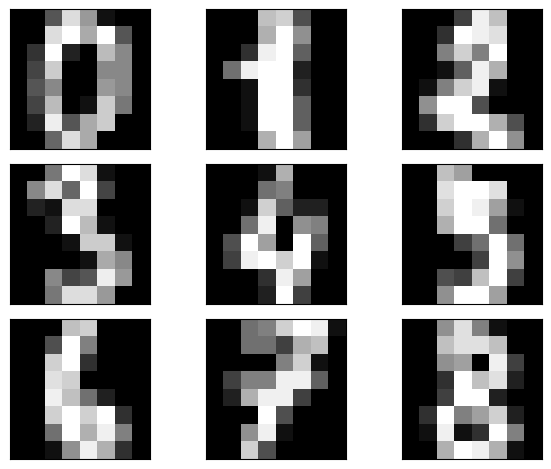

In [3]:
X_images = digits.images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_images[i], cmap=plt.cm.gray)
    plt.xticks(()), plt.yticks(())
plt.tight_layout()

# PCA

Shape after PCA: (1797, 2)
Variance expliquée par composante: [0.12033916 0.09561054]
Variance totale expliquée: 0.22


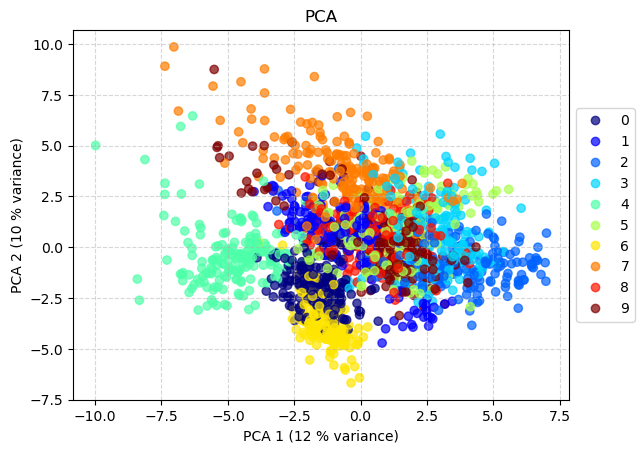

In [4]:
# 2. Appliquer PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Shape after PCA: {X_pca.shape}") # (1797, 2)
print(f"Variance expliquée par composante: {pca.explained_variance_ratio_}")
print(f"Variance totale expliquée: {np.sum(pca.explained_variance_ratio_):.2f}")

# 3. Visualiser les résultats
plt.figure()
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.get_cmap("jet", 10), alpha=0.7)
plt.title('PCA')
plt.xlabel(f'PCA 1 ({100*pca.explained_variance_ratio_[0]:.0f} % variance)')
plt.ylabel(f'PCA 2 ({100*pca.explained_variance_ratio_[1]:.0f} % variance)')
plt.legend(handles=scatter.legend_elements()[0], labels=list(digits.target_names), loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# TSNE

In [5]:
# Appliquer t-SNE (peut prendre un peu de temps)
print("Running t-SNE...")
time_start = time.time()
tsne = TSNE(n_components=2, perplexity=30, max_iter=300, random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_scaled) # Utiliser les données standardisées peut aider
time_end = time.time()
print(f"t-SNE finished in {time_end - time_start:.2f} seconds.")
print(f"Shape after t-SNE: {X_tsne.shape}") # (1797, 2)

Running t-SNE...
t-SNE finished in 2.26 seconds.
Shape after t-SNE: (1797, 2)


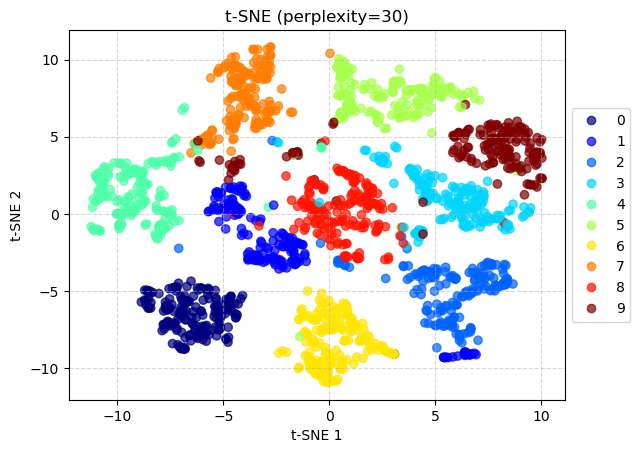

In [6]:
# Visualiser les résultats
plt.figure()
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.get_cmap("jet", 10), alpha=0.7)
plt.title('t-SNE (perplexity=30)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(handles=scatter.legend_elements()[0], labels=list(digits.target_names), loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# UMAP

In [7]:
# Appliquer UMAP
print("Running UMAP...")
time_start = time.time()
# n_neighbors: contrôle l'équilibre local/global (similaire à perplexity)
# min_dist: contrôle la proximité des points dans l'embedding
reducer = umap.UMAP(n_neighbors=10, min_dist=0.5, n_components=2)
X_umap = reducer.fit_transform(X_scaled) # UMAP fonctionne aussi bien sur données brutes ou scalées
time_end = time.time()
print(f"UMAP finished in {time_end - time_start:.2f} seconds.")
print(f"Shape after UMAP: {X_umap.shape}") # (1797, 2)

Running UMAP...
UMAP finished in 7.96 seconds.
Shape after UMAP: (1797, 2)


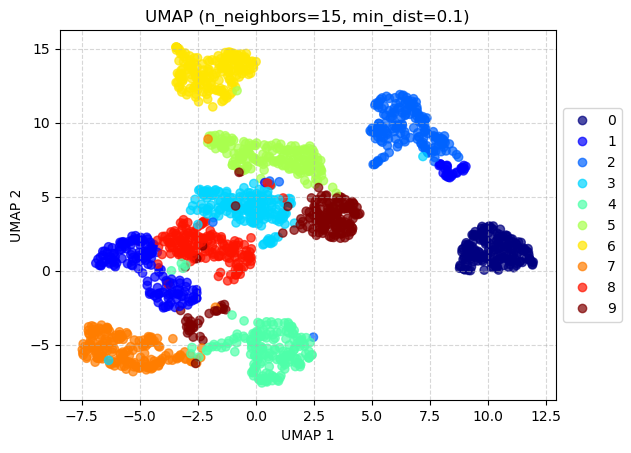

In [8]:
plt.figure()
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap=plt.get_cmap("jet", 10), alpha=0.7)
plt.title('UMAP (n_neighbors=15, min_dist=0.1)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(handles=scatter.legend_elements()[0], labels=list(digits.target_names), loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\numba\np\ufunc\dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
c:\ProgramData\anaconda3\Lib\site-packages\numba\np\ufunc\dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
c:\ProgramData\anaconda3\Lib\site-packages\numba\np\ufunc\dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)


<Axes: >

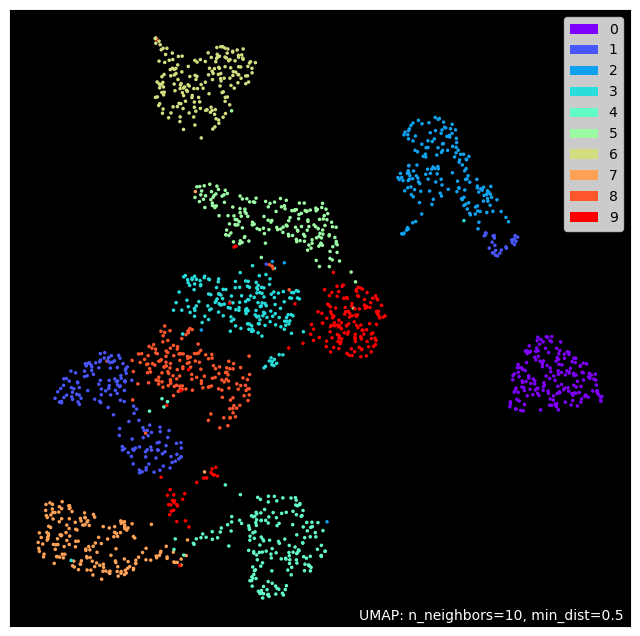

In [9]:
import umap.plot
umap.plot.points(reducer, labels=y, theme='fire')

<Axes: >

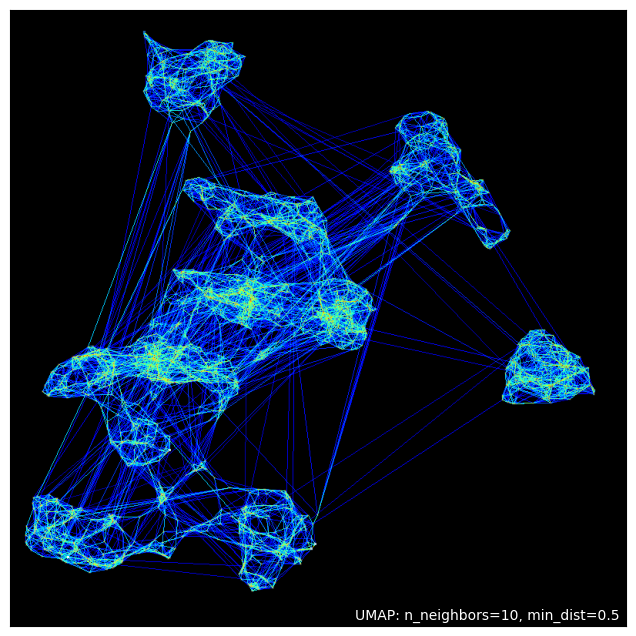

In [10]:
umap.plot.connectivity(reducer, show_points=True, background="black", values=X_umap.mean(axis=1), edge_cmap="jet")

c:\ProgramData\anaconda3\Lib\site-packages\umap\plot.py:895: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


packages <module 'dask' from 'c:\\ProgramData\\anaconda3\\Lib\\site-packages\\dask\\__init__.py'> <module 'skimage' from 'c:\\ProgramData\\anaconda3\\Lib\\site-packages\\skimage\\__init__.py'>


<Axes: >

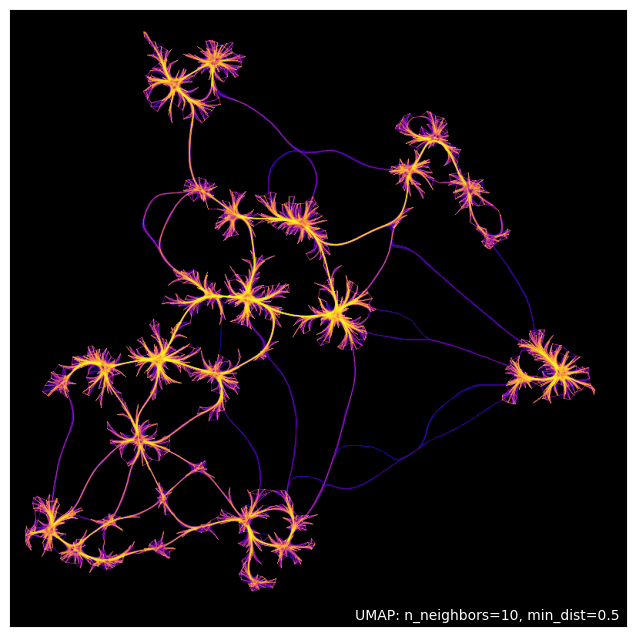

In [17]:
umap.plot.connectivity(reducer, edge_bundling='hammer', background="black", edge_cmap="plasma")